## NOTES:
- The following are experimental plots for data visualization related to the eventual publication of this study

## Imports

In [18]:
#Python3.10
import pandas as pd 
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from importlib import reload
import mapclassify

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func as fn
reload(cl)
reload(fn)

<module 'Src.func' from 'c:\\Users\\alekh\\OneDrive - University of California, Davis\\WORK\\DahlkeLab_LAWR\\Src\\func.py'>

Global Shapefiles:

In [3]:
# Takes about 30s to import these four files, but then they can be used everywhere in this notebook
huc2_shape = gpd.read_file('ShapeFiles/HUC2/_Master_HUC2/master_huc2.shp')
huc4_shape = gpd.read_file('ShapeFiles/HUC4/_Master_HUC4/master_huc4.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
stream_network = gpd.read_file('ShapeFiles/Lower48/stream_network.shp')

## Single Aquifer Metrics by HUC4 Plot
Visualizing the single highest {metric} per HUC4 for a given aquifer -- IN PROGRESS

In [53]:
aquifer = cl.high_plains_aquifer
range = 50
quantile = 95
metric = 'annual_hmf'
dataset = f'Prelim_Data/{aquifer.name}/{aquifer.name}_{range}_{quantile}.xlsx'

try:
    df_1 = pd.read_excel(dataset, dtype=fn.DATASET_DTYPES)
    df_1, _ = fn.filter_by_valid(df_1)
    df_1 = df_1.reset_index(drop=True)
except Exception as e:
    print(e)
    df_1 = pd.DataFrame()    

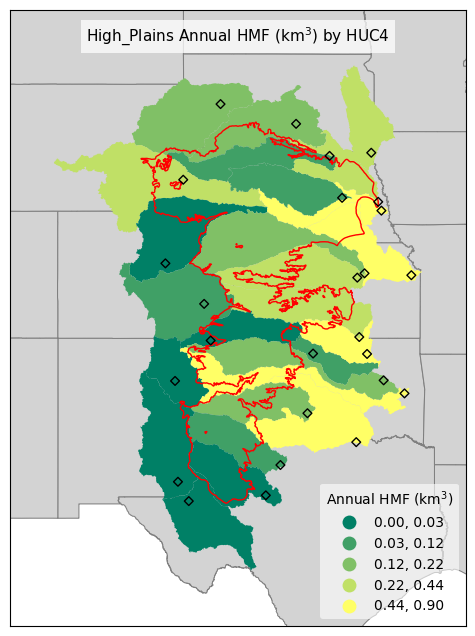

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
title = plt.title(f"{aquifer.name} {fn.FLOW_METRIC_UNITS[metric]} by HUC4", x=0.5, y=0.935, fontsize=11)
title.set_bbox({'facecolor': 'white', 'alpha': 0.75, 'edgecolor': 'none'})

legend_frmt = {
    "title": f"{fn.FLOW_METRIC_UNITS[metric]}",
    "loc": "lower right",
    "reverse": False,
    "facecolor": "white",
    "alignment": 'center',
    "edgecolor": 'none',
    "framealpha": 0.60
}

# Background plots
fn.plot_lower_48(ax, facecolor='lightgray', edgecolor='gray')
#fn.plot_stream_network(stream_network, ax)

huc4_shape_1 = huc4_shape[huc4_shape['huc4_code'].isin(aquifer.huc4s)]
if not df_1.empty:
    huc_max = df_1.groupby('huc4_code')[metric].idxmax()
    df_1 = df_1.loc[huc_max]
    gdf_1 = huc4_shape_1.merge(df_1, on='huc4_code')
    gdf_1.plot(ax=ax, column=metric, scheme="QUANTILES", cmap='summer', legend=True, legend_kwds=legend_frmt, alpha=1.0, edgecolor='none', linewidth=0.35)
    
aq_shape_1 = aq_shape[aq_shape['aq_name'] == aquifer.name]
aq_shape_1.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1.0, alpha=1.0)

if not df_1.empty:
    plt.scatter(gdf_1['dec_long_va'], gdf_1['dec_lat_va'], color='none', edgecolor='black', marker='D', s=20, alpha=1.0)  
    
xmin, xmax, ymin, ymax = fn.set_plot_bounds(huc4_shape_1, padding=1.75)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_yticks([])
ax.set_xticks([])
plt.show()